## Bag of Words

In [1]:
content = ["How to format my hard disk", " Hard disk format problems "]
content

['How to format my hard disk', ' Hard disk format problems ']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
?CountVectorizer

In [5]:
vectorizer = CountVectorizer(min_df = 1)

In [6]:
X = vectorizer.fit_transform(content)

In [7]:
X

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [10]:
print(vectorizer.get_feature_names())
X.toarray()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']


array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

## 計算查詢關鍵字對文章的距離

In [13]:
%ls data/toy

01.txt  02.txt  03.txt  04.txt  05.txt


In [17]:
import os
path  = 'data/toy'
[os.path.join(path, f) for f in os.listdir(path)]

['data/toy/01.txt',
 'data/toy/02.txt',
 'data/toy/03.txt',
 'data/toy/04.txt',
 'data/toy/05.txt']

In [19]:
posts = [open(os.path.join(path, f)).read() for f in os.listdir(path)]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
X_train = vectorizer.fit_transform(posts)

In [25]:
X_train

<5x25 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [22]:
# Tell you how many unique words
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [26]:
X_train.toarray()

array([[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0]], dtype=int64)

In [27]:
X_train.shape

(5, 25)

In [28]:
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())


#samples: 5, #features: 25
['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [31]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])

In [32]:
new_post_vec

<1x25 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [34]:
# Tell you how many unique words
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [33]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

## 計算查詢關鍵字對文章的距離 (距離一：歐式距離)

In [38]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta)

In [39]:
import numpy 
a = numpy.array([0,0,1,1,0])
b = numpy.array([1,0,1,0,0])
dist_raw(a,b)

1.4142135623730951

In [44]:
import math
a = [0,0,1,1,0]
b = [1,0,1,0,0]
d = []
for i in range(0,len(a)):
    d.append(a[i] - b[i])
math.sqrt(sum([ele ** 2for ele in d]))

1.4142135623730951

In [48]:
a = numpy.array([0,0,1,1,0])
b = numpy.array([1,0,1,0,0])
math.sqrt(sum((a - b)** 2) )

1.4142135623730951

In [49]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())

In [ ]:
import sys
best_doc = None
best_dist = 999
best_i = None
num_samples = len(posts)

for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print("=== Post %i with dist=%.2f: %s"%(i, d, post))
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))


In [56]:
for i in range(0,5):
    print(i, posts[i], dist_raw(X_train[i], new_post_vec))

0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. 3.872983346207417
1 Imaging databases provide storage capabilities. 2.0
2 Most imaging databases safe images permanently. 2.23606797749979
3 Imaging databases store data. 1.7320508075688772
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. 5.5677643628300215


## 計算查詢關鍵字對文章的距離 (距離二：標準化後的歐式距離)

In [57]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [64]:
a = numpy.array([1,1,1,0,0])
#math.sqrt(3)
a / sp.linalg.norm(a)

array([0.57735027, 0.57735027, 0.57735027, 0.        , 0.        ])

In [65]:
b = numpy.array([3,3,3,0,0])
b / sp.linalg.norm(b)

array([0.57735027, 0.57735027, 0.57735027, 0.        , 0.        ])

In [59]:
for i in range(0,5):
    print(i, posts[i], dist(X_train[i], new_post_vec))

0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
1 Imaging databases provide storage capabilities. 1.0514622242382672
2 Most imaging databases safe images permanently. 1.0878894332937856
3 Imaging databases store data. 1.0
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


In [66]:
# Tell you how many unique words
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


## 移除停用詞

In [67]:
! pip install nltk

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [69]:
vectorizer = CountVectorizer(min_df=1, stop_words='english')
X = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())
print(X.shape)

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'toy']
(5, 18)


In [70]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])

In [72]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [71]:
for i in range(0,5):
    print(i, posts[i], dist(X[i], new_post_vec))

0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
1 Imaging databases provide storage capabilities. 1.0514622242382672
2 Most imaging databases safe images permanently. 1.0514622242382672
3 Imaging databases store data. 1.0
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


## Stemming

In [73]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')


In [74]:
s.stem('graphics')

'graphic'

In [75]:
print(s.stem("imaging"))
print(s.stem("image"))

print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


In [76]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [77]:
vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
X = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())
print(X.shape)

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']
(5, 17)


In [78]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])

In [80]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [82]:
for i in range(0,5):
    print(i, posts[i], dist(X[i], new_post_vec))

0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
1 Imaging databases provide storage capabilities. 0.8573732768944039
2 Most imaging databases safe images permanently. 0.6296288974669553
3 Imaging databases store data. 0.7653668647301795
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.7653668647301795


## TF-IDF  詞頻矩陣

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
X = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())
print(X.shape)

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'toy']
(5, 18)


In [86]:
#X.toarray()

In [88]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])

In [89]:
for i in range(0,5):
    print(i, posts[i], dist(X[i], new_post_vec))

0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
1 Imaging databases provide storage capabilities. 1.187009812033225
2 Most imaging databases safe images permanently. 1.187009812033225
3 Imaging databases store data. 1.091020922163783
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.091020922163783


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [91]:
vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
X = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())
print(X.shape)

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']
(5, 17)


In [92]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])

In [93]:
for i in range(0,5):
    print(i, posts[i], dist(X[i], new_post_vec))

0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
1 Imaging databases provide storage capabilities. 1.0789758507558254
2 Most imaging databases safe images permanently. 0.859044512133176
3 Imaging databases store data. 0.924634506718001
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.924634506718001


## 中文詞頻矩陣

In [105]:
! pip uninstall jieba

Uninstalling jieba-0.39:
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba-0.39.dist-info/INSTALLER
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba-0.39.dist-info/METADATA
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba-0.39.dist-info/RECORD
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba-0.39.dist-info/WHEEL
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba-0.39.dist-info/top_level.txt
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/__init__.py
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/__init__.pyc
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/__main__.py
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/__pycache__/__init__.cpython-36.pyc
  /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/__pycache__/__main__.cpython-36

## 繁體中文版jieba
- https://github.com/ldkrsi/jieba-zh_TW

In [3]:
import jieba
jieba.load_userdict('userdict.txt')

for w in jieba.cut('柯文哲為了大巨蛋一事找趙藤雄算帳'):
    print(w)

柯文哲
為
了
大巨蛋
一事
找
趙藤雄
算帳


In [7]:
a = ['柯文哲為了大巨蛋一事找趙藤雄算帳', '柯P將不在大巨蛋舉辦世運會']

courpus  = []
for s in a:
    courpus.append(' '.join(jieba.cut(s)))
courpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將不在 大巨蛋 舉辦 世運會']

In [8]:
corpus = [' '.join(jieba.cut(s)) for s in a]
corpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將不在 大巨蛋 舉辦 世運會']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
X = vectorizer.fit_transform(corpus)

In [10]:
X

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [11]:
print(vectorizer.get_feature_names())

['一事', '世運會', '大巨蛋', '將不在', '柯p', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [12]:
print(X.toarray())

[[1 0 1 0 0 1 1 0 1]
 [0 1 1 1 1 0 0 1 0]]


In [17]:
import scipy as sp
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [18]:
dist(X[0],X[1])

1.2649110640673518

In [38]:
import requests
keyword = '郭雪芙'
res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(keyword))

In [39]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [40]:
synonym = []
for p in soup.select('.mw-parser-output p'):
    for b in p.select('b'):
        synonym.append(b.text)
synonym

['郭雪芙', 'Puff Kuo']

## synonyms.txt
- 柯文哲/柯P/柯p
- 郭雪芙/puff

In [42]:
synonym_dic = {}
for s in open('synonyms.txt'):
    synonym = s.strip().split('/')
    for w in synonym[1:]:
        synonym_dic[w.lower()]  = synonym[0]
synonym_dic

{'puff': '郭雪芙', '柯p': '柯文哲'}

In [43]:
import nltk.stem

class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synonym_dic.get(w, w) for w in analyzer(doc))

vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


['一事', '世運會', '大巨蛋', '將不在', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [44]:
X.toarray()

array([[1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 0]], dtype=int64)

In [45]:
stopwords = ['為了', '一事', '將不在']

vectorizer = SynonymCountVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


['世運會', '大巨蛋', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [47]:
content = [ '2天才女童到澳洲深造 竟全身傷疑受虐',
'來自台灣、現在只有9歲與7歲的2名兒童，上周六(13日)流落於澳洲街頭時被當地警方發現帶回安置，懷疑受虐和人口販運有關，隨即通知我國警方，不過經調查發現，這2名高智商的女童，其實是由父親委託友人帶去澳洲自主學習，父親表示並非遭到人口販運，小姐妹數理方面優異，當初委託朋友帶到澳洲深造。']

In [49]:
corpus = [' '.join(jieba.cut(s)) for s in content]

In [52]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [57]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())

In [58]:
dist_raw(X[0], X[1])

7.681145747868608

In [59]:
X.toarray()

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
        1, 1, 1]], dtype=int64)

In [60]:
content=  ['我喜歡看電視不喜歡看電影','我不喜歡看電視也不喜歡看電影']

In [61]:
corpus = [' '.join(jieba.cut(s)) for s in content]

In [67]:
corpus

['我 喜歡 看 電視 不 喜歡 看 電影', '我 不 喜歡 看 電視 也 不 喜歡 看 電影']

In [80]:
content = ['柯文哲為了大巨蛋一事找趙藤雄算帳', '柯P將不在大巨蛋舉辦世運會']
corpus = [' '.join(jieba.cut(s)) for s in content]

In [81]:
import nltk.stem

class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synonym_dic.get(w, w) for w in analyzer(doc))

vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


['一事', '世運會', '大巨蛋', '將不在', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [82]:
X.toarray()

array([[1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 0]], dtype=int64)

In [83]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)
cs

array([[1. , 0.4],
       [0.4, 1. ]])

In [84]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)
cs

array([[0. , 0.6],
       [0.6, 0. ]])

## 新聞推薦系統

In [85]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx')

In [91]:
import jieba
corpus = []
titles = []
for rec in news.iterrows():
    #print(rec)
    #break
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    titles.append(rec[1].title)

In [92]:
corpus[0]

'新增 ： 立委 說 法民進 黨 立法院 黨團 預計 在 明天 的 院會 中 ， 讓 改制 農田 水利 會 的 《 農田 水利 會 組織 通則 》 修正 草案 付委 ， 國民黨 主席 吳敦義 昨在 中常 會上 表示 ， 對 於 蔡 政府 這種 巧取 豪奪 水利 會資產 作法 要 全力 反對 ， 「 甚至 要 有 夜宿 立法院 的 準備 」 。 對此 ， 民進 黨 立委 蔡易餘 今天 早上 發臉 書 表示 ， 吳敦義的 軍令狀 已 經破功 了 ， 「 因為 我們 已 經先 佔 議場 前 ， 24 小時 固守 活動 開始 ！ ！ 」 民進 黨 立院 黨團書 記長 何欣純 今早 表示 ， 目前 排班 兩小時 一班 ， 夜晚 則由 男性 立委 負責 駐守 ， 不換班 。 民進 黨團 總召 柯建銘 今早 也 特別 叮嚀 綠委 ， 要 去 洗手 間 時 ， 必須 要 確認 一定 要 有 一個 人 駐守 在 議場 門口 ， 不能 全部 離開 。 今早 也 有 綠委說 ， 好險 今天 天氣 回暖 ， 坐在 這裡 沒有 問題 。 （ 黃 信維 ／ 台北 報導 ） 發稿 時間 ： 09 : 09 更新 時間 ： 09 : 23 \xa0 想 知道 更 多 ， 一定 要 看 … … 國 防部 解約慶富 要 提告 \u3000 馮世 寬 怒 嗆 三遍 ： 請 便 罷免 案將 投票 \u3000 李遠 哲今 再度 現身力 挺 黃 國昌 【 歷史 上 的 今天 】 賴香伶當 選北市 勞動 局長 \u3000 周錫瑋花 百萬蓋 縣長 辦 公室'

In [93]:
len(corpus)

899

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
X = vectorizer.fit_transform(corpus)

In [95]:
X

<899x38653 sparse matrix of type '<class 'numpy.int64'>'
	with 128155 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [105]:
cs.shape

(899, 899)

In [106]:
cs[0:3,0:3]

array([[0.        , 0.96829548, 0.94683527],
       [0.96829548, 0.        , 0.9739099 ],
       [0.94683527, 0.9739099 , 0.        ]])

In [103]:
import numpy as np
a = np.array([80,70,56,63,89,90])
a.argsort()

array([2, 3, 1, 0, 4, 5])

In [108]:
sorted_pos = cs[  0  ,  : ].argsort()

In [109]:
titles[0]

'【更新】水利會改官派明闖關\u3000綠委24小時前顧議場大門防藍突襲'

In [114]:
for idx in sorted_pos[1:11]:
    if cs[0,idx] < 0.8:
        print(titles[idx], cs[0,idx])

反對水利會改制　吳敦義下令：藍委做好夜宿立院抗爭準備 0.6321547504275353
農田水利會改公務機關　蔡英文：這不是綁樁 0.6724128474406619
罷免案將投票　李遠哲今再度現身力挺黃國昌 0.7771295373006972
在野黨突襲表決《勞基法》修正案無效　民進黨烙人成功擋下 0.778385915154946
【搏感情動畫】台電每年30億敦親睦鄰費　協助立委選民服務 0.7844869521946108
國防部解約慶富要提告　馮世寬怒嗆三遍：請便 0.7946408559172016


In [116]:
def getSimiliarArticle(pos):
    print('查詢文章:',titles[pos])
    sorted_pos = cs[  pos  ,  : ].argsort()
    for idx in sorted_pos[1:11]:
        if cs[pos,idx] < 0.8:
            print('關聯文章:', titles[idx], cs[pos,idx])

In [117]:
getSimiliarArticle(0)

查詢文章: 【更新】水利會改官派明闖關　綠委24小時前顧議場大門防藍突襲
關聯文章: 反對水利會改制　吳敦義下令：藍委做好夜宿立院抗爭準備 0.6321547504275353
關聯文章: 農田水利會改公務機關　蔡英文：這不是綁樁 0.6724128474406619
關聯文章: 罷免案將投票　李遠哲今再度現身力挺黃國昌 0.7771295373006972
關聯文章: 在野黨突襲表決《勞基法》修正案無效　民進黨烙人成功擋下 0.778385915154946
關聯文章: 【搏感情動畫】台電每年30億敦親睦鄰費　協助立委選民服務 0.7844869521946108
關聯文章: 國防部解約慶富要提告　馮世寬怒嗆三遍：請便 0.7946408559172016


In [118]:
getSimiliarArticle(12)

查詢文章: 黃國昌：長期目標要消滅國民黨　不支持柯文哲的兩岸一家親
關聯文章: 「兩蔣時代」超譯　網友：不准傷皇城內的和氣！ 0.5791275247889435
關聯文章: 罷免案將投票　李遠哲今再度現身力挺黃國昌 0.595349265179326
關聯文章: 黃國昌若被罷免會更強　他：成為選輸北市的阿扁 0.6343677782259318
關聯文章: 罷昌案周六投票　時代力量全力澄清不實謠言 0.6561575542619899
關聯文章: 【聲援片】沈發惠呼籲罷昌案投「不同意」　黃國昌：謝謝您 0.7538388282723372


In [120]:
getSimiliarArticle(25)

查詢文章: 桃園工廠火勢熄滅　員工宿舍內發現一堆白骨
關聯文章: 【不斷更新】桃園工廠惡火撲滅 6人仍失聯宿舍內發現一堆白骨 0.36731278412423196
關聯文章: 汽車用品大廠「矽卡」燒毀　資本額達2億 0.5443494259494621
關聯文章: 桃園工廠大火6員工失聯　家屬焦急等待 0.6699125279936771
關聯文章: 醉女盧小小　女警帥爆！突然霸氣送她側摔　 0.7894412780969211


## 文章分群

In [121]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20150628news.xlsx')

In [123]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [124]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1].description)))
    titles.append(rec[1].title)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [126]:
X

<147x12825 sparse matrix of type '<class 'numpy.int64'>'
	with 23783 stored elements in Compressed Sparse Row format>

In [129]:
from sklearn.metrics.pairwise import cosine_distances
n_cosine_similarities  = cosine_distances(X)

In [131]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=4, init='k-means++', random_state=42)
c = km.fit_predict(n_cosine_similarities)

In [137]:
import numpy as np
titles_ary = np.array(titles)
for e in titles_ary[c==3]:
    print(e)

希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


In [138]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx')

In [141]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    titles.append(rec[1].title)

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [143]:
from sklearn.metrics.pairwise import cosine_distances
n_cosine_similarities  = cosine_distances(X)

In [144]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=4, init='k-means++', random_state=42)
c = km.fit_predict(n_cosine_similarities)

In [152]:
import numpy as np
titles_ary = np.array(titles)
for e in titles_ary[c==0]:
    print(e)

小嫻婚變冒毒菇　勾于美人「奉茶」夢魘
明明是好康分享文　網友卻瘋喊噁心慎入
「想抱孫要看天！」　他批小嫻婆婆殘忍強逼
【好聚不好散】離婚掏出6千萬　這女星比小嫻還慘
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
十二月十四日各報頭條搶先報
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
【毒菇護弟】何守正姊姊不是華岡七仙女　美法連線批小嫻
小嫻離婚導火線　拉何守正信妙禪
【狗仔偷拍】何守正現身！「全台最沒尊嚴的婆婆」也出來了
小嫻中分手魔咒！ 同公司4女星全都婚變
他因為小嫻婚變被分手　網友跪求：拜託別放生
潔哥目睹「正嫻之變」　驚呼：靠北系列竟是真的
何守正姐姐神護航！遭網友酸：全台最討人厭大姑
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
【小嫻婚變】他說很奇怪　「一定是男生劈腿？」
教友小嫻婚姻觸礁　曾之喬談情避不開Seafood
小嫻守正結婚在台沒登記　想離婚只有兩條路
胡瓜2個月前耳聞小嫻婚變　震驚之餘好心疼
昔日搭檔談小嫻婚變　曾國城這樣說
何守正兩個姊姊護航扯婆媳　「他」戳破媽寶特色
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先做這件事！
【K律師論點】離婚＝失敗？　K律師這麼說
真尷尬！他只是聊個天　正妹就退出對話了
女網紅因為這理由挺余祥銓！讓人不知該哭還是笑
「小嫻不快樂！」　許聖梅：何守正虧欠她
一下車有人墜樓掉在車頂　網友：車牌有密碼
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻多信妙禪？　曾見證「師父帶我跳舞」
【話當年】被拍和她上賓館　何守正掰了阿妹
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【有片】何守正小嫻驚爆離婚　健身房中嗅出端倪
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄


In [153]:
from sklearn.metrics import silhouette_score

sil_ary = []
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append({'group':k,
                    'silhouette':silhouette_score(n_cosine_similarities, labels=c)})


In [154]:
sil_ary

[{'group': 2, 'silhouette': 0.6755654471937644},
 {'group': 3, 'silhouette': 0.15338953682280074},
 {'group': 4, 'silhouette': 0.0904743616163152},
 {'group': 5, 'silhouette': 0.09023331250993877},
 {'group': 6, 'silhouette': 0.09313344671208439},
 {'group': 7, 'silhouette': 0.09492595900171423},
 {'group': 8, 'silhouette': 0.08392193629479042},
 {'group': 9, 'silhouette': 0.08136447983549083},
 {'group': 10, 'silhouette': 0.08227220344756503},
 {'group': 11, 'silhouette': 0.08755001584378343},
 {'group': 12, 'silhouette': 0.08561332919793142},
 {'group': 13, 'silhouette': 0.08764196760874017},
 {'group': 14, 'silhouette': 0.08075272813877192},
 {'group': 15, 'silhouette': 0.0794831753988302},
 {'group': 16, 'silhouette': 0.08161712976054764},
 {'group': 17, 'silhouette': 0.08502936338670943},
 {'group': 18, 'silhouette': 0.09061744831829563},
 {'group': 19, 'silhouette': 0.0827405617617394},
 {'group': 20, 'silhouette': 0.08647846673217109}]

In [155]:
import pandas
sil_df = pandas.DataFrame(sil_ary)
sil_df

,group,silhouette
0,2,0.675565
1,3,0.153390
2,4,0.090474
3,5,0.090233
4,6,0.093133
5,7,0.094926
6,8,0.083922
7,9,0.081364
8,10,0.082272
9,11,0.087550


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'dist', 'rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


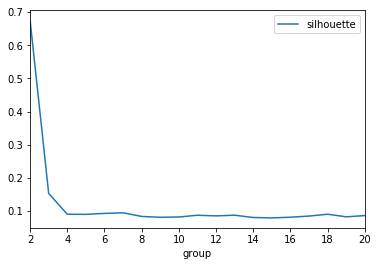

In [156]:
% pylab inline
sil_df.plot(kind = 'line', x='group', y='silhouette')
